In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, StackingClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, make_scorer, f1_score, recall_score, precision_score
from xgboost import XGBClassifier

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Internship Aug/PROJECT 3/Churn_Modelling (1).csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data = data.drop('RowNumber', axis=1)

In [ ]:
data.describe(include='all')

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


Np of unique values in each column

In [ ]:
data.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

No NaN in each column

In [ ]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
data = data.drop('CustomerId', axis=1)
data = data.drop('Surname', axis=1)

In [ ]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

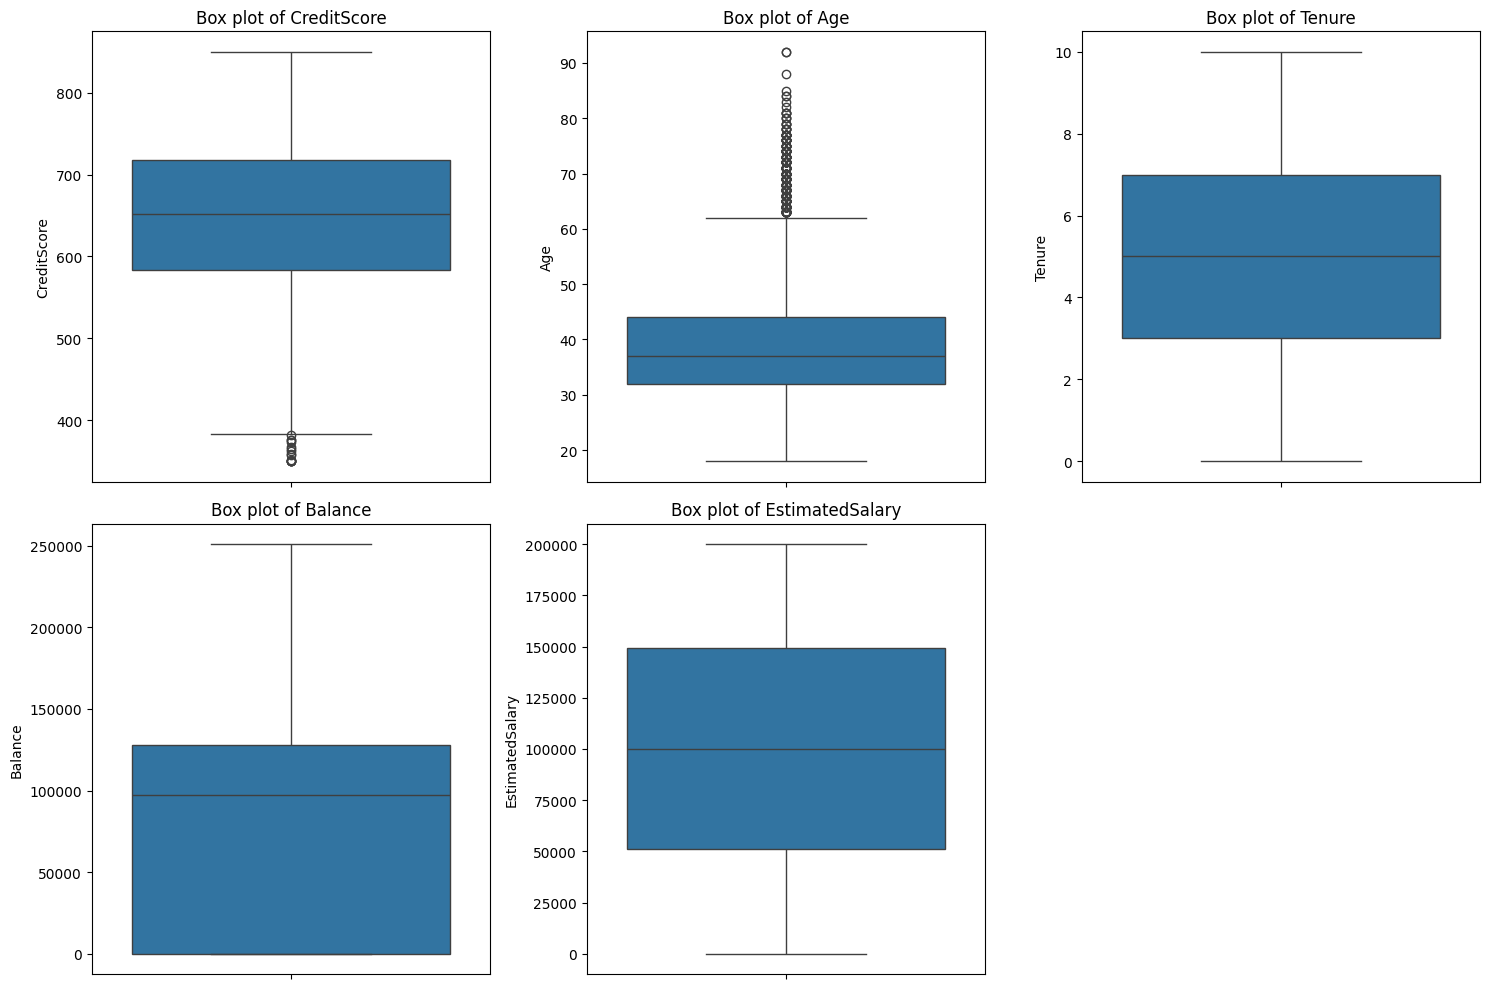

In [ ]:
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid if needed
    sns.boxplot(y=data[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

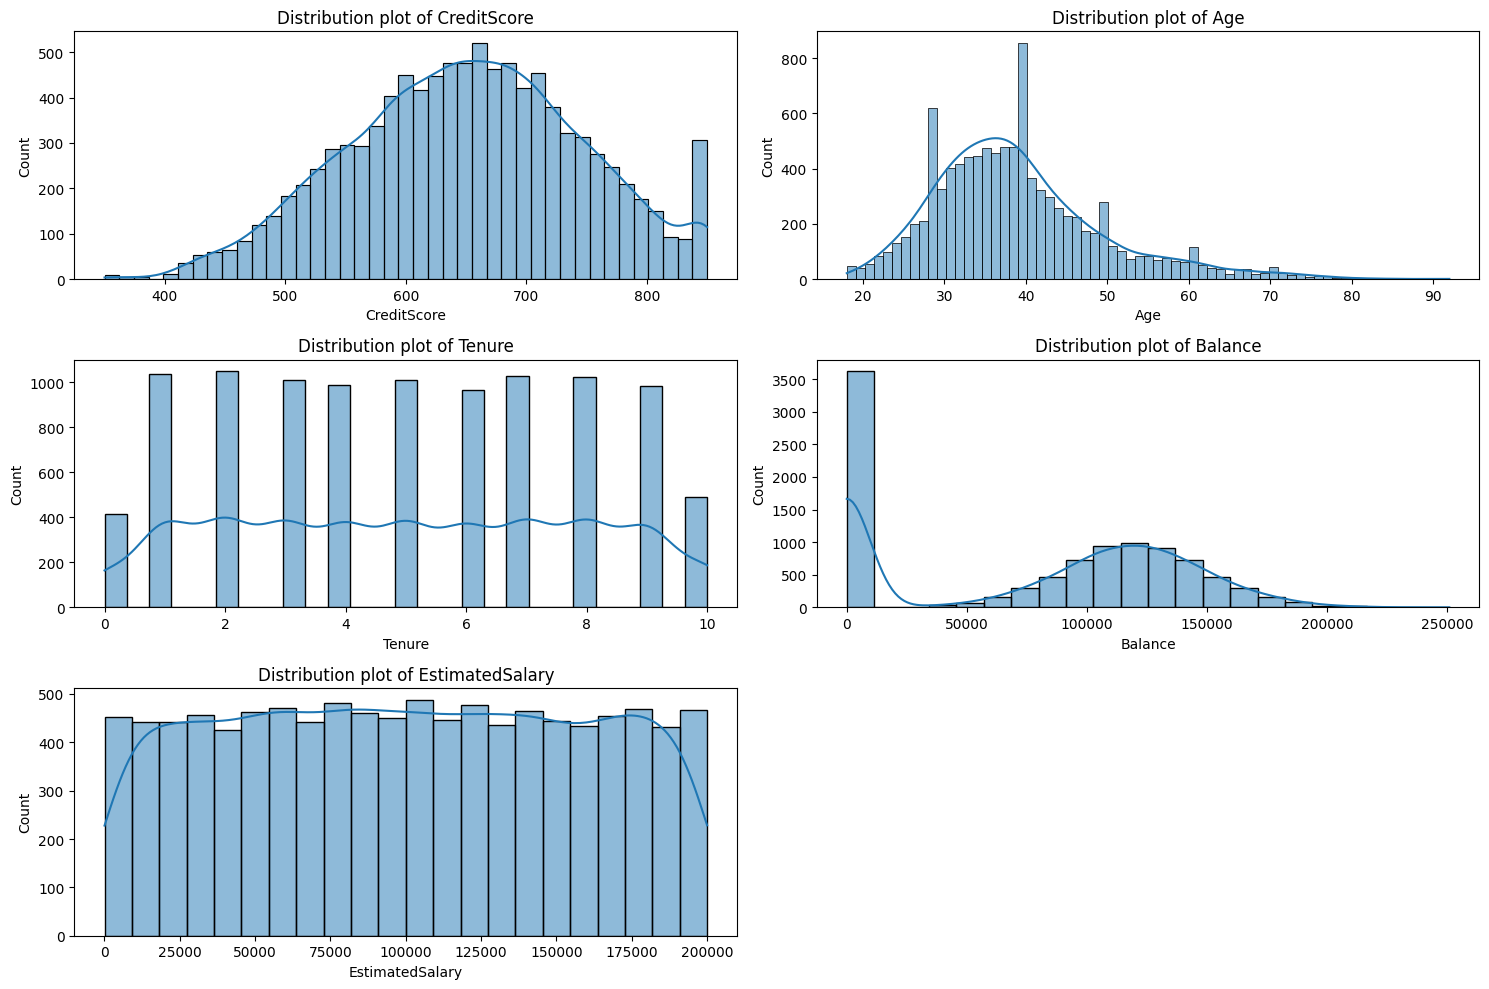

In [ ]:
# Generate displots for the specified columns
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # Adjust subplot grid if needed
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution plot of {column}')

plt.tight_layout()
plt.show()

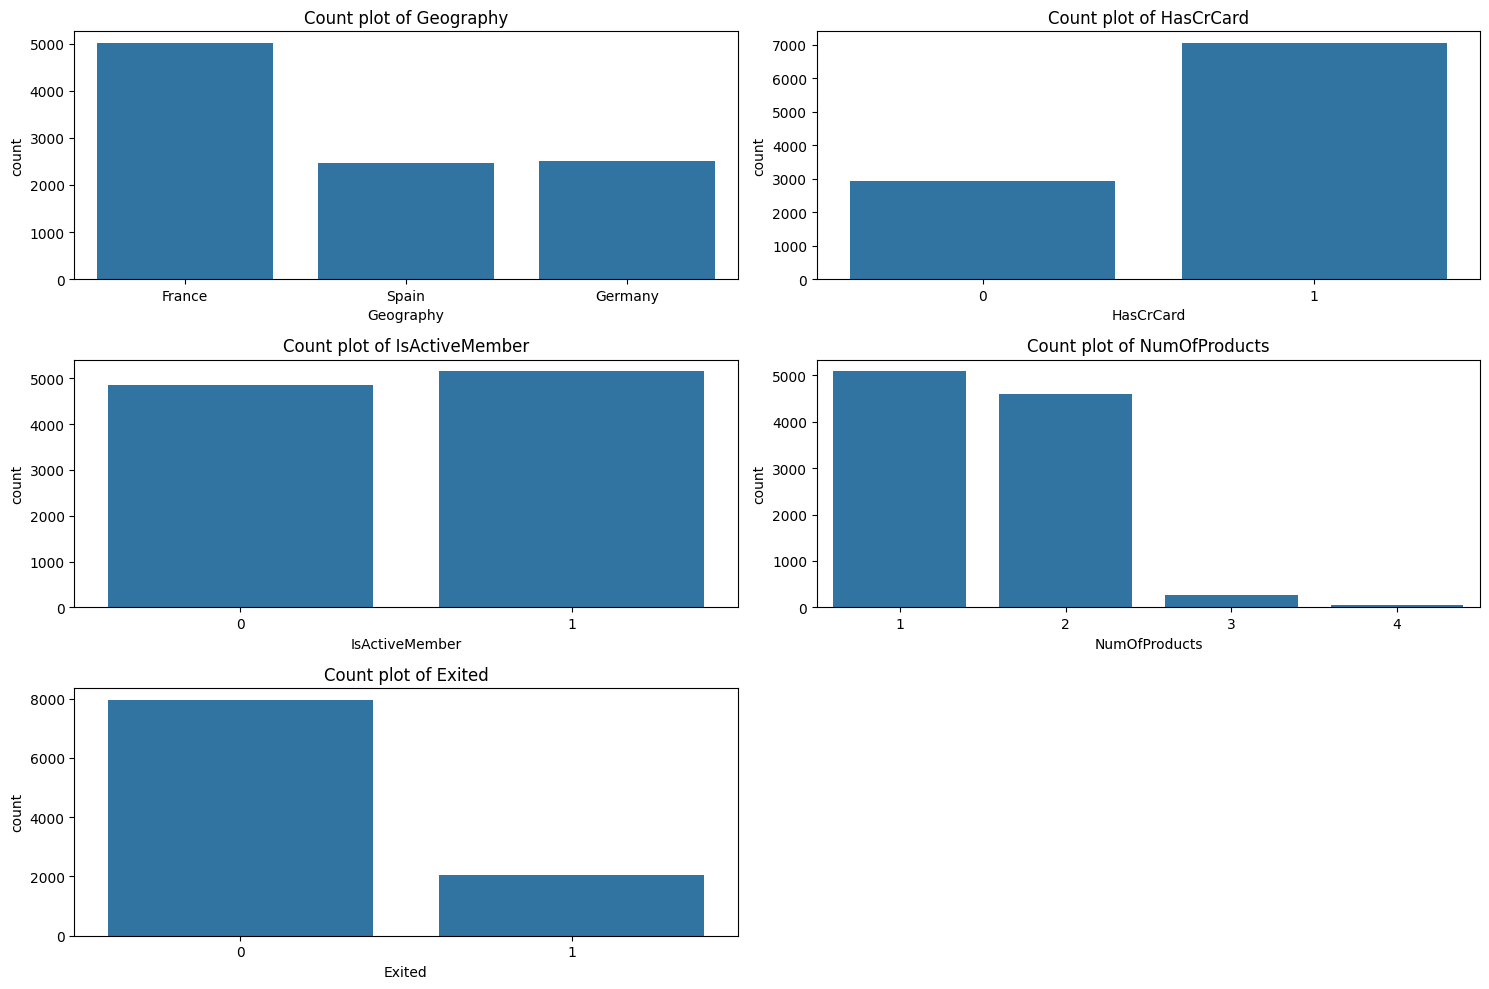

In [ ]:
columns_to_plot = ['Geography', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Exited']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # Adjust subplot grid if needed
    sns.countplot(x=data[column])
    plt.title(f'Count plot of {column}')

plt.tight_layout()
plt.show()

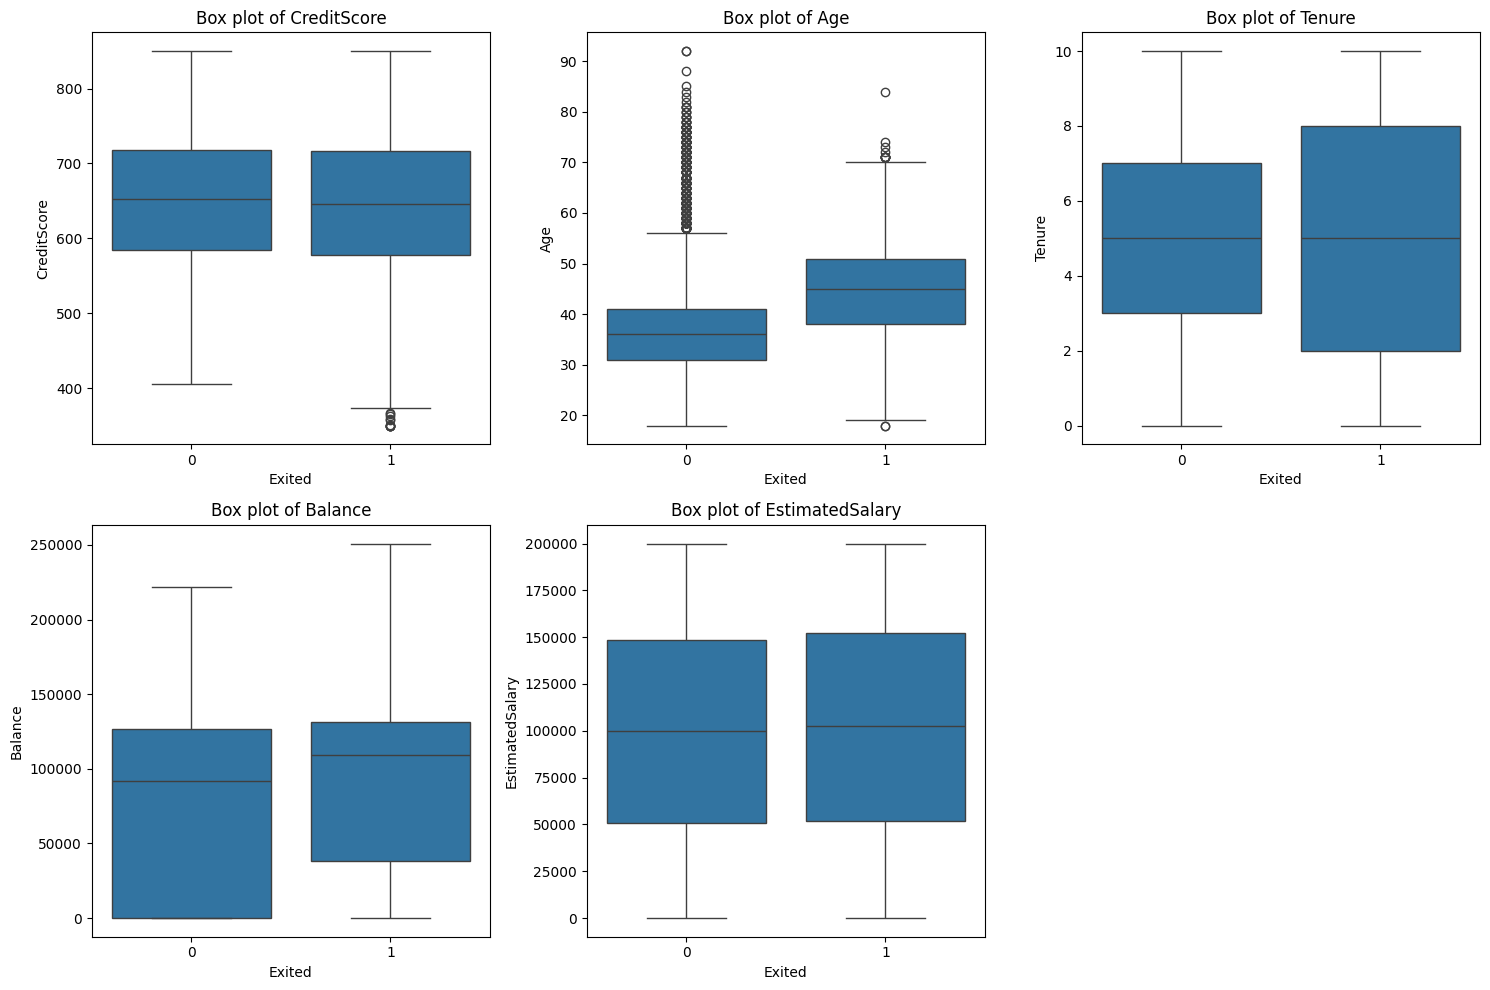

In [ ]:
# Generate box plots for the specified columns
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

plt.figure(figsize=(15, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)  # Adjust subplot grid if needed
    sns.boxplot(y=data[column], x=data['Exited'])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

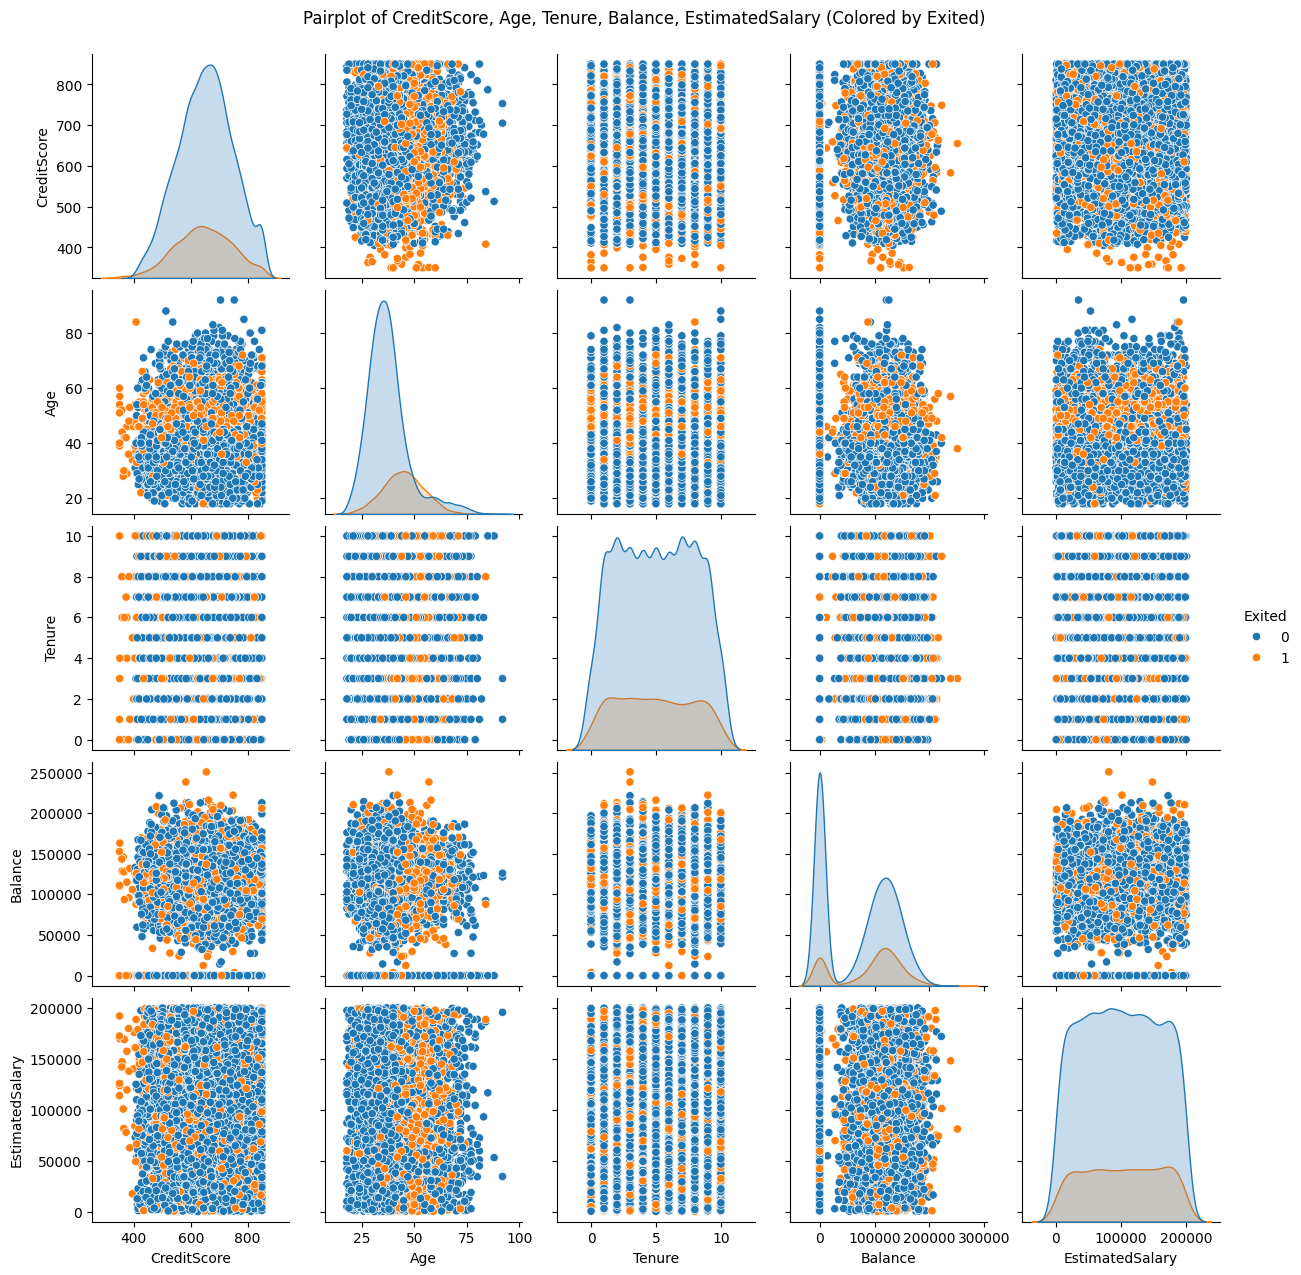

In [ ]:
columns_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'Exited']
sns.pairplot(data[columns_to_plot], hue='Exited')
plt.suptitle('Pairplot of CreditScore, Age, Tenure, Balance, EstimatedSalary (Colored by Exited)', y=1.02)
plt.show()

In [ ]:
'CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'
'Geography', 'HasCrCard', 'IsActiveMember'
'NumOfProducts'
'Exited'

'Exited'

# One Hot encoding + SMOTE

In [ ]:
nominal_cols = ['Geography', 'Gender']
data_nominal_encoded = pd.get_dummies(data[nominal_cols], drop_first=True)
data_nominal_encoded = data_nominal_encoded.astype(int)

# Combine encoded columns back into the DataFrame
df = pd.concat([data.drop(columns=nominal_cols), data_nominal_encoded], axis=1)
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0


In [ ]:
y = df[['Exited']]
X = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain','Gender_Male']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12740, 11), (12740, 1), (2000, 11), (2000, 1))

# Decision Tree

## Decision Tree without prunning

In [ ]:
classifier = DecisionTreeClassifier()
model = classifier.fit(X_train, y_train)

In [ ]:
classifier.score(X_train, y_train)

1.0

In [ ]:
classifier.score(X_test, y_test)

0.75

Text(0, 0.5, 'Importance')

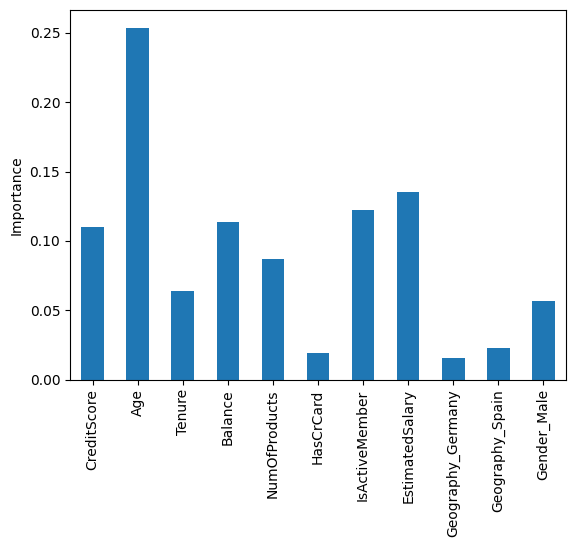

In [ ]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

## Decision Tree Post Prunning

In [ ]:
classifier = DecisionTreeClassifier(random_state = 0)
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[0:-1]
len(ccp_alphas)

856

In [ ]:
train_scores, test_scores = [], []
abs_score_diffs = []
f1_scores, recalls, precisions = [], [], []

f1_scorer = make_scorer(f1_score, average='macro')
recall_scorer = make_scorer(recall_score, average='macro')
precision_scorer = make_scorer(precision_score, average='macro')

for alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)

    train_cv_scores = cross_val_score(classifier, X_train, y_train, cv=5)
    test_cv_scores = cross_val_score(classifier, X_test, y_test, cv=5)

    train_score = np.mean(train_cv_scores)
    test_score = np.mean(test_cv_scores)
    train_scores.append(train_score)
    test_scores.append(test_score)
    abs_score_diff = np.abs(train_score - test_score)
    abs_score_diffs.append(abs_score_diff)

    model_ = classifier.fit(X_train, y_train)

    y_pred = model_.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True)
    f1_scores.append(report['macro avg']['f1-score'])
    recalls.append(report['macro avg']['recall'])
    precisions.append(report['macro avg']['precision'])

In [ ]:
min_diff_index = np.argmin(abs_score_diffs)
best_alpha = ccp_alphas[min_diff_index]
print("Min score diff :",min(abs_score_diffs))
print("index of best alpha : ", min_diff_index)
print("Best alpha : ", best_alpha)

Min score diff : 0.0004128728414443117
index of best alpha :  826
Best alpha :  0.0009494854875442462


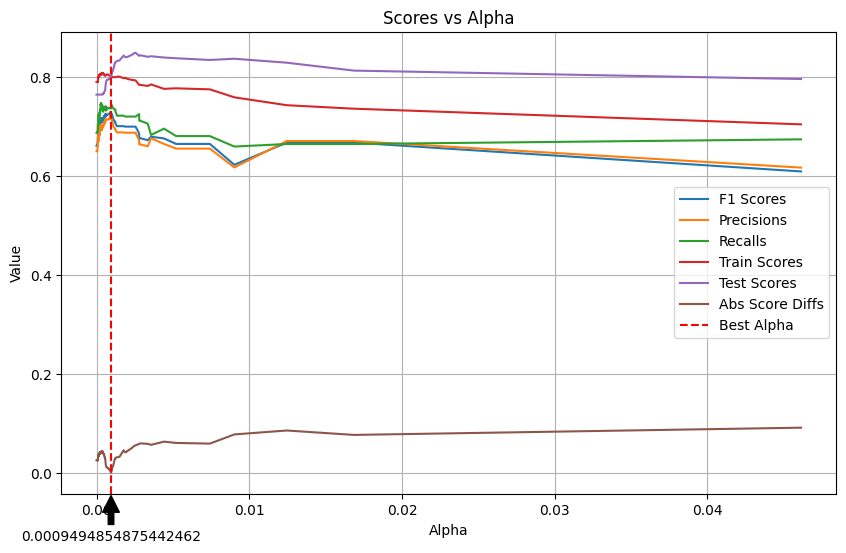

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, f1_scores, label='F1 Scores')
plt.plot(ccp_alphas, precisions, label='Precisions')
plt.plot(ccp_alphas, recalls, label='Recalls')
plt.plot(ccp_alphas, train_scores, label='Train Scores')
plt.plot(ccp_alphas, test_scores, label='Test Scores')
plt.plot(ccp_alphas, abs_score_diffs, label='Abs Score Diffs')

plt.axvline(x=best_alpha, linestyle='--', label='Best Alpha', color='r')

# Annotate the best alpha value on the plot
plt.annotate(f'{best_alpha}',
             xy=(best_alpha, plt.ylim()[0]),
             xytext=(best_alpha, plt.ylim()[0] - (plt.ylim()[1] - plt.ylim()[0]) * 0.1),
             arrowprops=dict(facecolor='black', shrink=0.05),
             horizontalalignment='center')

plt.xlabel("Alpha")
plt.ylabel("Value")
plt.title("Scores vs Alpha")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
classifier = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0009494854875442462)
model = classifier.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

0.8171114599686028

In [ ]:
model.score(X_test, y_test)

0.8185

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1593
           1       0.55      0.60      0.57       407

    accuracy                           0.82      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.82      0.82      0.82      2000



Text(0, 0.5, 'Importance')

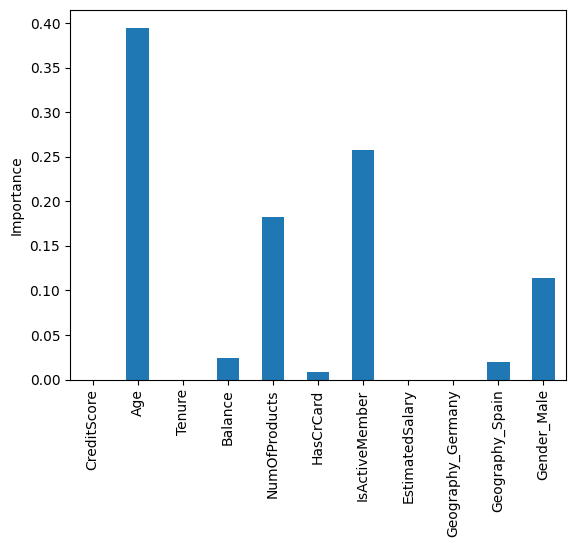

In [ ]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

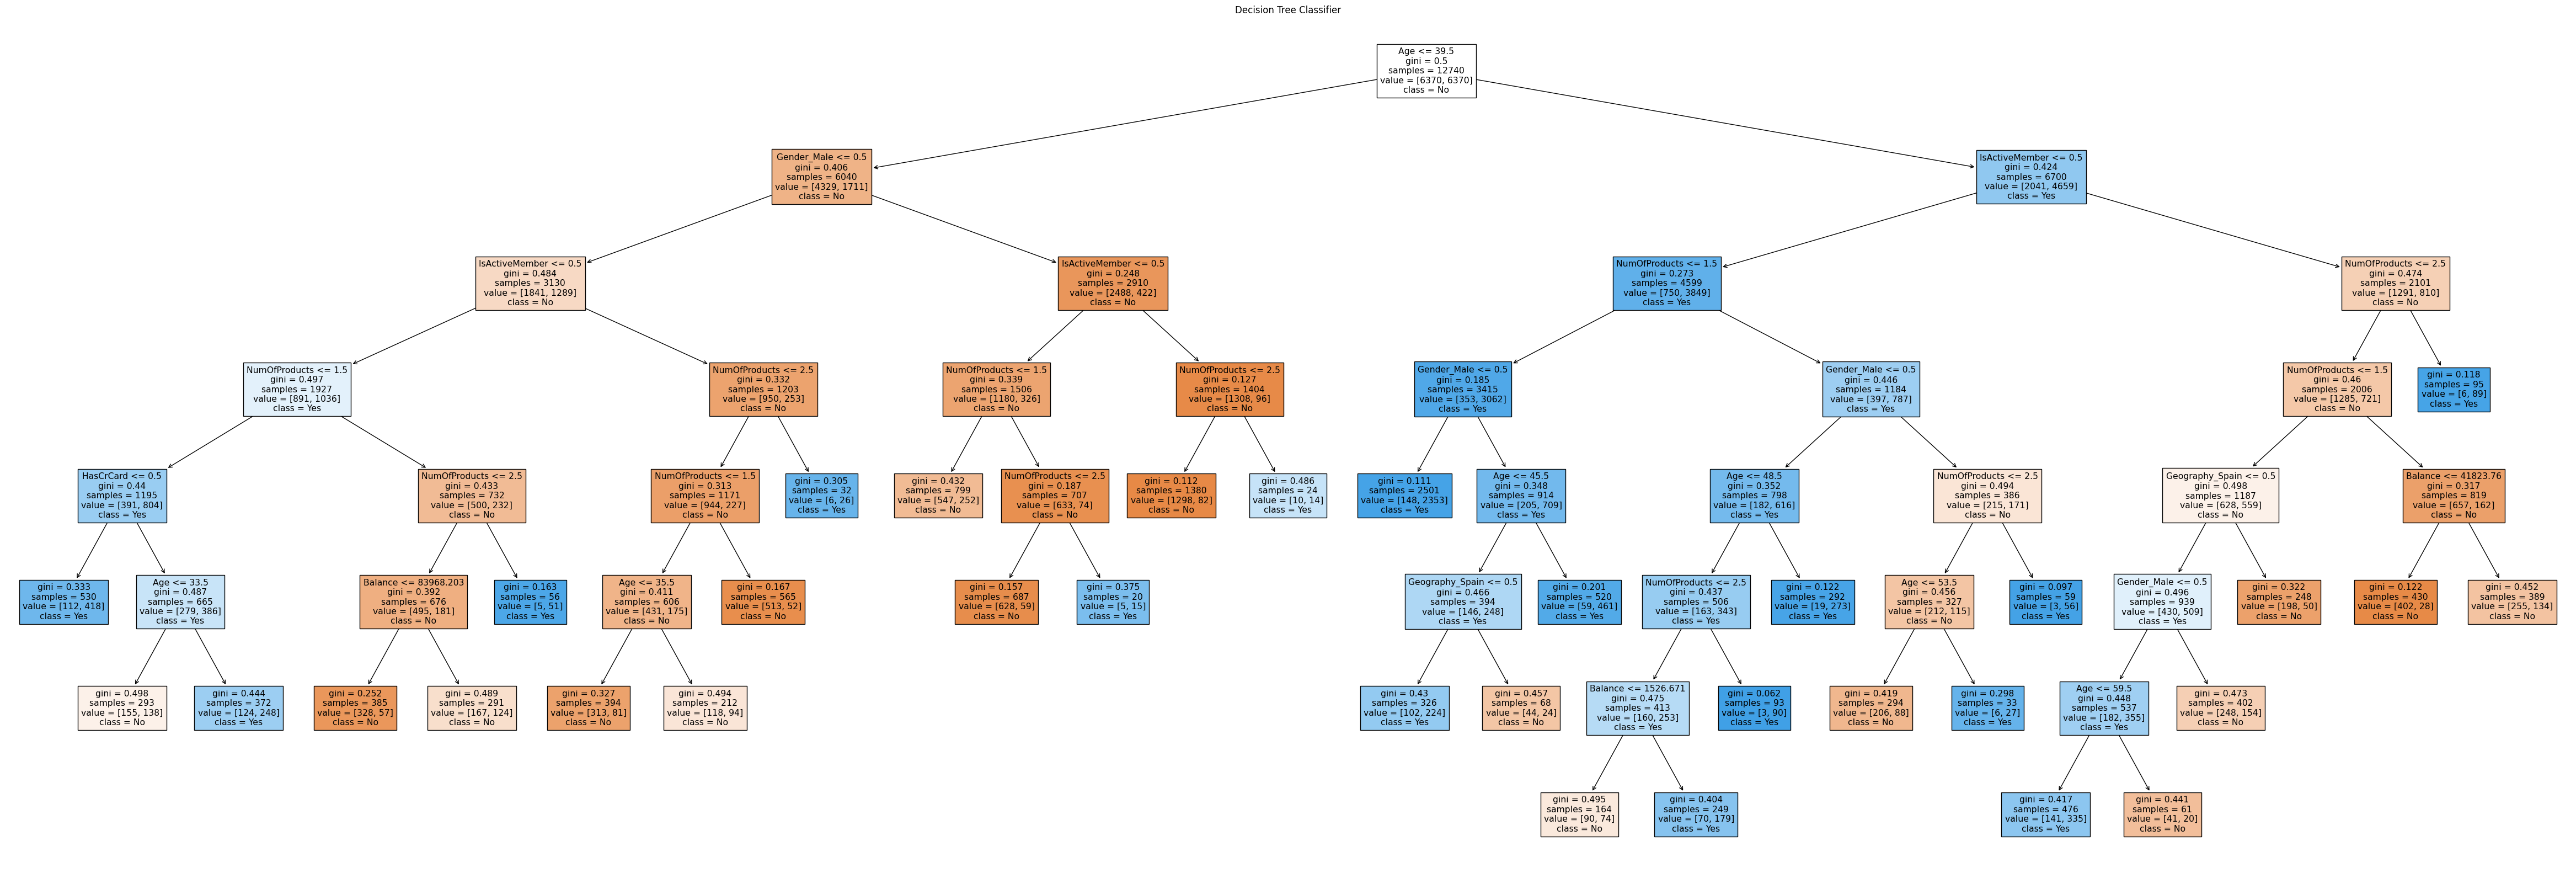

In [ ]:
plt.figure(figsize=(60, 20))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=False)
plt.title("Decision Tree Classifier")
plt.show()

# Random Forest

## Random Forest without prunning

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

<ipython-input-44-be3a03c8f067>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
classifier.score(X_train, y_train)

1.0

In [ ]:
classifier.score(X_test, y_test)

0.815

Text(0, 0.5, 'Importance')

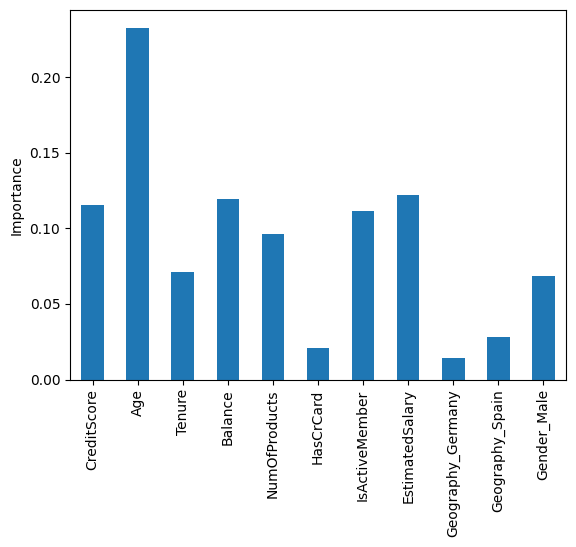

In [ ]:
importance = classifier.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

# Ada Boost Classifier

## AdaBoostClassifier without prunning

In [ ]:
classifier = AdaBoostClassifier()
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [ ]:
classifier.score(X_train, y_train)

0.8295918367346938

In [ ]:
classifier.score(X_test, y_test)

0.7835

Text(0, 0.5, 'Importance')

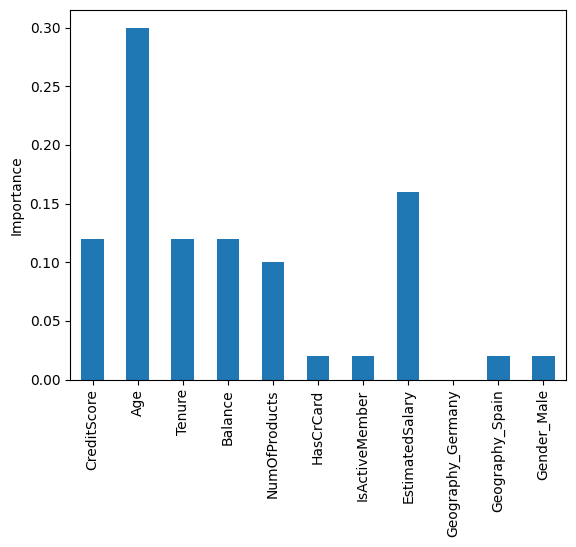

In [ ]:
importance = classifier.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

## AdaBoostClassifier with Post Prunning

In [ ]:
grid = {
    'n_estimators' : range(10, 90, 10),
    'learning_rate': [.3, .4, .8, 1, 1.2, 1.4]
}
classifier = AdaBoostClassifier(random_state = 0)
gcv = GridSearchCV(estimator=classifier, param_grid=grid, cv=5, verbose=3)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.3, n_estimators=10;, score=0.696 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.3, n_estimators=10;, score=0.791 total time=   0.1s
[CV 3/5] END learning_rate=0.3, n_estimators=10;, score=0.834 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.3, n_estimators=10;, score=0.821 total time=   0.1s
[CV 5/5] END learning_rate=0.3, n_estimators=10;, score=0.818 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.3, n_estimators=20;, score=0.715 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.3, n_estimators=20;, score=0.811 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.3, n_estimators=20;, score=0.846 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.3, n_estimators=20;, score=0.827 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.3, n_estimators=20;, score=0.822 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.3, n_estimators=30;, score=0.720 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.3, n_estimators=30;, score=0.813 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.3, n_estimators=30;, score=0.850 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.3, n_estimators=30;, score=0.828 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.3, n_estimators=30;, score=0.823 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.3, n_estimators=40;, score=0.731 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.3, n_estimators=40;, score=0.821 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.3, n_estimators=40;, score=0.852 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.3, n_estimators=40;, score=0.835 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.3, n_estimators=40;, score=0.826 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.3, n_estimators=50;, score=0.732 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.3, n_estimators=50;, score=0.824 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.3, n_estimators=50;, score=0.854 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.3, n_estimators=50;, score=0.835 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.3, n_estimators=50;, score=0.830 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.3, n_estimators=60;, score=0.736 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.3, n_estimators=60;, score=0.827 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.3, n_estimators=60;, score=0.858 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.3, n_estimators=60;, score=0.834 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.3, n_estimators=60;, score=0.831 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.3, n_estimators=70;, score=0.734 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.3, n_estimators=70;, score=0.828 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.3, n_estimators=70;, score=0.857 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.3, n_estimators=70;, score=0.838 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.3, n_estimators=70;, score=0.831 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.3, n_estimators=80;, score=0.737 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.3, n_estimators=80;, score=0.830 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.3, n_estimators=80;, score=0.858 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.3, n_estimators=80;, score=0.837 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.3, n_estimators=80;, score=0.832 total time=   0.9s
[CV 1/5] END learning_rate=0.4, n_estimators=10;, score=0.699 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.4, n_estimators=10;, score=0.805 total time=   0.1s
[CV 3/5] END learning_rate=0.4, n_estimators=10;, score=0.833 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.4, n_estimators=10;, score=0.822 total time=   0.2s
[CV 5/5] END learning_rate=0.4, n_estimators=10;, score=0.812 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.4, n_estimators=20;, score=0.726 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.4, n_estimators=20;, score=0.813 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.4, n_estimators=20;, score=0.843 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.4, n_estimators=20;, score=0.824 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.4, n_estimators=20;, score=0.825 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.4, n_estimators=30;, score=0.729 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.4, n_estimators=30;, score=0.822 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.4, n_estimators=30;, score=0.852 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.4, n_estimators=30;, score=0.833 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.4, n_estimators=30;, score=0.828 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.4, n_estimators=40;, score=0.733 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.4, n_estimators=40;, score=0.825 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.4, n_estimators=40;, score=0.855 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.4, n_estimators=40;, score=0.833 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.4, n_estimators=40;, score=0.830 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.4, n_estimators=50;, score=0.733 total time=   1.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.4, n_estimators=50;, score=0.830 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.4, n_estimators=50;, score=0.857 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.4, n_estimators=50;, score=0.837 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.4, n_estimators=50;, score=0.830 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.4, n_estimators=60;, score=0.737 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.4, n_estimators=60;, score=0.830 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.4, n_estimators=60;, score=0.856 total time=   1.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.4, n_estimators=60;, score=0.835 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.4, n_estimators=60;, score=0.833 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.4, n_estimators=70;, score=0.737 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.4, n_estimators=70;, score=0.828 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.4, n_estimators=70;, score=0.856 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.4, n_estimators=70;, score=0.840 total time=   1.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.4, n_estimators=70;, score=0.834 total time=   1.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.4, n_estimators=80;, score=0.739 total time=   1.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.4, n_estimators=80;, score=0.830 total time=   2.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.4, n_estimators=80;, score=0.856 total time=   2.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.4, n_estimators=80;, score=0.839 total time=   2.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.4, n_estimators=80;, score=0.836 total time=   1.9s
[CV 1/5] END learning_rate=0.8, n_estimators=10;, score=0.727 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.8, n_estimators=10;, score=0.813 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.8, n_estimators=10;, score=0.844 total time=   0.3s
[CV 4/5] END learning_rate=0.8, n_estimators=10;, score=0.821 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.8, n_estimators=10;, score=0.819 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.8, n_estimators=20;, score=0.730 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.8, n_estimators=20;, score=0.823 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.8, n_estimators=20;, score=0.851 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.8, n_estimators=20;, score=0.835 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.8, n_estimators=20;, score=0.826 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.8, n_estimators=30;, score=0.731 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.8, n_estimators=30;, score=0.830 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.8, n_estimators=30;, score=0.855 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.8, n_estimators=30;, score=0.845 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.8, n_estimators=30;, score=0.827 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.8, n_estimators=40;, score=0.728 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.8, n_estimators=40;, score=0.827 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.8, n_estimators=40;, score=0.855 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.8, n_estimators=40;, score=0.843 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.8, n_estimators=40;, score=0.831 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.8, n_estimators=50;, score=0.733 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.8, n_estimators=50;, score=0.830 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.8, n_estimators=50;, score=0.855 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.8, n_estimators=50;, score=0.845 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.8, n_estimators=50;, score=0.838 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.8, n_estimators=60;, score=0.732 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.8, n_estimators=60;, score=0.829 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.8, n_estimators=60;, score=0.855 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.8, n_estimators=60;, score=0.847 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.8, n_estimators=60;, score=0.836 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.8, n_estimators=70;, score=0.735 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.8, n_estimators=70;, score=0.828 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.8, n_estimators=70;, score=0.856 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.8, n_estimators=70;, score=0.847 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.8, n_estimators=70;, score=0.839 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=0.8, n_estimators=80;, score=0.729 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=0.8, n_estimators=80;, score=0.828 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=0.8, n_estimators=80;, score=0.856 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=0.8, n_estimators=80;, score=0.846 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=0.8, n_estimators=80;, score=0.838 total time=   0.8s
[CV 1/5] END ..learning_rate=1, n_estimators=10;, score=0.721 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..learning_rate=1, n_estimators=10;, score=0.815 total time=   0.1s
[CV 3/5] END ..learning_rate=1, n_estimators=10;, score=0.851 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..learning_rate=1, n_estimators=10;, score=0.830 total time=   0.1s
[CV 5/5] END ..learning_rate=1, n_estimators=10;, score=0.828 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..learning_rate=1, n_estimators=20;, score=0.719 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..learning_rate=1, n_estimators=20;, score=0.826 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..learning_rate=1, n_estimators=20;, score=0.853 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..learning_rate=1, n_estimators=20;, score=0.834 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..learning_rate=1, n_estimators=20;, score=0.829 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..learning_rate=1, n_estimators=30;, score=0.729 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..learning_rate=1, n_estimators=30;, score=0.828 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..learning_rate=1, n_estimators=30;, score=0.855 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..learning_rate=1, n_estimators=30;, score=0.841 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..learning_rate=1, n_estimators=30;, score=0.831 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..learning_rate=1, n_estimators=40;, score=0.730 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..learning_rate=1, n_estimators=40;, score=0.828 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..learning_rate=1, n_estimators=40;, score=0.856 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..learning_rate=1, n_estimators=40;, score=0.849 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..learning_rate=1, n_estimators=40;, score=0.834 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..learning_rate=1, n_estimators=50;, score=0.730 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..learning_rate=1, n_estimators=50;, score=0.830 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..learning_rate=1, n_estimators=50;, score=0.855 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..learning_rate=1, n_estimators=50;, score=0.846 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..learning_rate=1, n_estimators=50;, score=0.838 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..learning_rate=1, n_estimators=60;, score=0.729 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..learning_rate=1, n_estimators=60;, score=0.828 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..learning_rate=1, n_estimators=60;, score=0.856 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..learning_rate=1, n_estimators=60;, score=0.845 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..learning_rate=1, n_estimators=60;, score=0.838 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..learning_rate=1, n_estimators=70;, score=0.733 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..learning_rate=1, n_estimators=70;, score=0.831 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..learning_rate=1, n_estimators=70;, score=0.855 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..learning_rate=1, n_estimators=70;, score=0.847 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..learning_rate=1, n_estimators=70;, score=0.839 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..learning_rate=1, n_estimators=80;, score=0.731 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..learning_rate=1, n_estimators=80;, score=0.830 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..learning_rate=1, n_estimators=80;, score=0.856 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..learning_rate=1, n_estimators=80;, score=0.846 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..learning_rate=1, n_estimators=80;, score=0.839 total time=   0.8s
[CV 1/5] END learning_rate=1.2, n_estimators=10;, score=0.718 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.2, n_estimators=10;, score=0.813 total time=   0.1s
[CV 3/5] END learning_rate=1.2, n_estimators=10;, score=0.851 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.2, n_estimators=10;, score=0.833 total time=   0.1s
[CV 5/5] END learning_rate=1.2, n_estimators=10;, score=0.825 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.2, n_estimators=20;, score=0.721 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.2, n_estimators=20;, score=0.824 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.2, n_estimators=20;, score=0.857 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.2, n_estimators=20;, score=0.839 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.2, n_estimators=20;, score=0.833 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.2, n_estimators=30;, score=0.735 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.2, n_estimators=30;, score=0.828 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.2, n_estimators=30;, score=0.854 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.2, n_estimators=30;, score=0.841 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.2, n_estimators=30;, score=0.840 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.2, n_estimators=40;, score=0.730 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.2, n_estimators=40;, score=0.829 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.2, n_estimators=40;, score=0.855 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.2, n_estimators=40;, score=0.843 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.2, n_estimators=40;, score=0.839 total time=   0.4s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.2, n_estimators=50;, score=0.729 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.2, n_estimators=50;, score=0.827 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.2, n_estimators=50;, score=0.855 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.2, n_estimators=50;, score=0.849 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.2, n_estimators=50;, score=0.839 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.2, n_estimators=60;, score=0.729 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.2, n_estimators=60;, score=0.828 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.2, n_estimators=60;, score=0.853 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.2, n_estimators=60;, score=0.849 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.2, n_estimators=60;, score=0.841 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.2, n_estimators=70;, score=0.726 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.2, n_estimators=70;, score=0.827 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.2, n_estimators=70;, score=0.852 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.2, n_estimators=70;, score=0.843 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.2, n_estimators=70;, score=0.841 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.2, n_estimators=80;, score=0.726 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.2, n_estimators=80;, score=0.827 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.2, n_estimators=80;, score=0.855 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.2, n_estimators=80;, score=0.846 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.2, n_estimators=80;, score=0.839 total time=   0.8s
[CV 1/5] END learning_rate=1.4, n_estimators=10;, score=0.708 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.4, n_estimators=10;, score=0.809 total time=   0.1s
[CV 3/5] END learning_rate=1.4, n_estimators=10;, score=0.839 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.4, n_estimators=10;, score=0.828 total time=   0.1s
[CV 5/5] END learning_rate=1.4, n_estimators=10;, score=0.826 total time=   0.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.4, n_estimators=20;, score=0.728 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.4, n_estimators=20;, score=0.819 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.4, n_estimators=20;, score=0.845 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.4, n_estimators=20;, score=0.834 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.4, n_estimators=20;, score=0.830 total time=   0.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.4, n_estimators=30;, score=0.726 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.4, n_estimators=30;, score=0.824 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.4, n_estimators=30;, score=0.850 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.4, n_estimators=30;, score=0.842 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.4, n_estimators=30;, score=0.838 total time=   0.3s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.4, n_estimators=40;, score=0.728 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.4, n_estimators=40;, score=0.826 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.4, n_estimators=40;, score=0.851 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.4, n_estimators=40;, score=0.843 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.4, n_estimators=40;, score=0.835 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.4, n_estimators=50;, score=0.725 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.4, n_estimators=50;, score=0.826 total time=   0.8s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.4, n_estimators=50;, score=0.855 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.4, n_estimators=50;, score=0.847 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.4, n_estimators=50;, score=0.842 total time=   0.5s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.4, n_estimators=60;, score=0.727 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.4, n_estimators=60;, score=0.827 total time=   1.1s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.4, n_estimators=60;, score=0.853 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.4, n_estimators=60;, score=0.850 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.4, n_estimators=60;, score=0.845 total time=   0.6s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.4, n_estimators=70;, score=0.730 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.4, n_estimators=70;, score=0.824 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.4, n_estimators=70;, score=0.850 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.4, n_estimators=70;, score=0.845 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.4, n_estimators=70;, score=0.847 total time=   0.7s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END learning_rate=1.4, n_estimators=80;, score=0.732 total time=   0.9s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END learning_rate=1.4, n_estimators=80;, score=0.822 total time=   1.0s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END learning_rate=1.4, n_estimators=80;, score=0.851 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END learning_rate=1.4, n_estimators=80;, score=0.846 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END learning_rate=1.4, n_estimators=80;, score=0.839 total time=   1.2s


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'learning_rate': [0.3, 0.4, 0.8, 1, 1.2, 1.4],
                         'n_estimators': range(10, 90, 10)},
             verbose=3)

In [ ]:
gcv.best_params_

{'learning_rate': 1, 'n_estimators': 70}

In [ ]:
model = gcv.best_estimator_
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=1, n_estimators=70, random_state=0)

In [ ]:
model.score(X_train, y_train)

0.8294348508634223

In [ ]:
model.score(X_test, y_test)

0.783

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1593
           1       0.48      0.64      0.55       407

    accuracy                           0.78      2000
   macro avg       0.69      0.73      0.70      2000
weighted avg       0.81      0.78      0.79      2000



Text(0, 0.5, 'Importance')

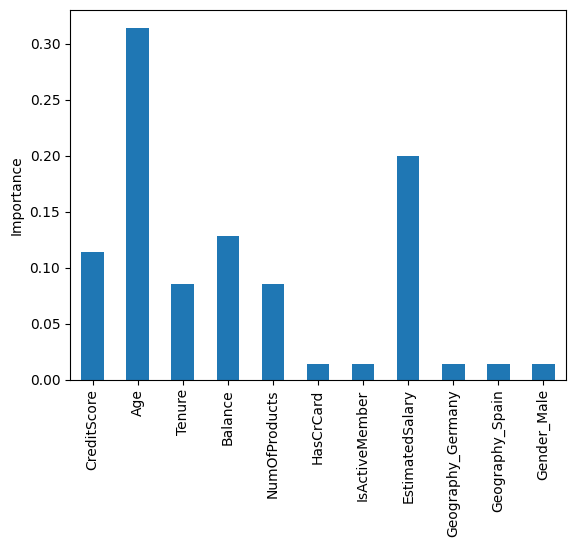

In [ ]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance')

# XGBoost

## XGBoost without Prunning

In [ ]:
classifier = XGBClassifier(random_state=0)
classifier.fit(X_train, y_train)
classifier.score(X_train, y_train), classifier.score(X_test, y_test)

(0.9511773940345369, 0.814)

## XGBoost Pre Tunning

In [ ]:
grid = {
    'reg_lambda' :  np.arange(.5, 1.5, 0.2),
    'reg_alpha' : np.arange(0, 1.5, 0.2),
    'min_child_weight': [.8, 1, 1.2]
}
classifier = XGBClassifier(random_state=0)
gcv = GridSearchCV(estimator=classifier, param_grid=grid, cv=5, verbose=3)
gcv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END min_child_weight=0.8, reg_alpha=0.0, reg_lambda=0.5;, score=0.768 total time=   0.3s
[CV 2/5] END min_child_weight=0.8, reg_alpha=0.0, reg_lambda=0.5;, score=0.859 total time=   1.1s
[CV 3/5] END min_child_weight=0.8, reg_alpha=0.0, reg_lambda=0.5;, score=0.889 total time=   0.2s
[CV 4/5] END min_child_weight=0.8, reg_alpha=0.0, reg_lambda=0.5;, score=0.885 total time=   0.2s
[CV 5/5] END min_child_weight=0.8, reg_alpha=0.0, reg_lambda=0.5;, score=0.884 total time=   0.2s
[CV 1/5] END min_child_weight=0.8, reg_alpha=0.0, reg_lambda=0.7;, score=0.766 total time=   0.2s
[CV 2/5] END min_child_weight=0.8, reg_alpha=0.0, reg_lambda=0.7;, score=0.865 total time=   0.2s
[CV 3/5] END min_child_weight=0.8, reg_alpha=0.0, reg_lambda=0.7;, score=0.886 total time=   0.2s
[CV 4/5] END min_child_weight=0.8, reg_alpha=0.0, reg_lambda=0.7;, score=0.883 total time=   0.2s
[CV 5/5] END min_child_weight=0.8, reg_alpha=0.0, reg_l

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'min_child_weight': [0.8, 1, 1.2],
                         'reg_alpha': array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4]),
                         'reg_lambda': array([0.5, 0.7, 0.9, 1.1, 1.3])},
             verbose=3)

In [ ]:
gcv.best_params_

{'min_child_weight': 0.8, 'reg_alpha': 0.4, 'reg_lambda': 1.0999999999999999}

In [ ]:
model = gcv.best_estimator_
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=0.8, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [ ]:
model.score(X_train, y_train)

0.9519623233908948

In [ ]:
model.score(X_test, y_test)

0.813

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1593
           1       0.53      0.63      0.58       407

    accuracy                           0.81      2000
   macro avg       0.72      0.74      0.73      2000
weighted avg       0.83      0.81      0.82      2000



# VotingClassifier

In [ ]:
classifier1 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0009494854875442462)
classifier2 = AdaBoostClassifier(n_estimators=70, learning_rate=1)
classifier3 = XGBClassifier(min_child_weight=0.8, reg_alpha=0.4, reg_lambda=1.0999999999999999)

voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', classifier1),
    ('AdaBoostClassifier', classifier2),
    ('XGBClassifier', classifier3)
], voting='hard')

voting_classifier.fit(X_train, y_train)
voting_classifier.score(X_train, y_train), voting_classifier.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


(0.8642072213500785, 0.8135)

# MODEL COMPARISION

In [ ]:
# Initialize the classifiers
classifier1 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0009494854875442462)
classifier2 = AdaBoostClassifier(n_estimators=70, learning_rate=1)
classifier3 = XGBClassifier(min_child_weight=0.8, reg_alpha=0.4, reg_lambda=1.0999999999999999)

# Create the voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', classifier1),
    ('AdaBoostClassifier', classifier2),
    ('XGBClassifier', classifier3)
], voting='hard')

# Fit the voting classifier
voting_classifier.fit(X_train, y_train)

# Initialize a dictionary to store the results
results = {
    "Model": [],
    "Train Score": [],
    "Test Score": [],
    "F1 Score": [],
    "Recall": [],
    "Precision": []
}

# Function to calculate and store the metrics
def evaluate_model(name, model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    results["Model"].append(name)
    results["Train Score"].append(model.score(X_train, y_train))
    results["Test Score"].append(model.score(X_test, y_test))
    results["F1 Score"].append(f1_score(y_test, y_test_pred))
    results["Recall"].append(recall_score(y_test, y_test_pred))
    results["Precision"].append(precision_score(y_test, y_test_pred))

evaluate_model("Decision Tree", classifier1)
evaluate_model("AdaBoost", classifier3)
evaluate_model("XGBoost", classifier4)
evaluate_model("Voting Classifier", voting_classifier)

results_df = pd.DataFrame(results)

results_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the 

,Model,Train Score,Test Score,F1 Score,Recall,Precision
0,Decision Tree,0.817111,0.8185,0.573443,0.599509,0.549550
1,AdaBoost,0.951962,0.8130,0.576923,0.626536,0.534591
2,XGBoost,0.951962,0.8130,0.576923,0.626536,0.534591
3,Voting Classifier,0.951962,0.8130,0.576923,0.626536,0.534591
